# info
This script reads the Seahorse experiment data.
It performs quantitative analysis and builds figures for publication


In [1]:
# QA
#

# what is the difference between Y1 and Y2 tabs?
# how can I get a match with number of cells?
# ECAR data?
# 24 hours data?


In [60]:
import pandas

import scipy, scipy.stats

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

# 0. user-defined variables

In [3]:
input_file = '/home/adrian/gd15/hi/research/huvec/results/seahorse/huvecallwells.xlsx'

# 1. read data

In [4]:
df = pandas.read_excel(input_file, skiprows=8)
df

,Time (min),A01,A02,A03,A04,A05,A06,A07,A08,A09,...,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12
0,1.311822,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.775667,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.233321,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20.693441,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27.150621,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,33.607746,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,40.178781,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,46.639178,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,53.102267,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,59.671314,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
timepoints = df['Time (min)']

# 2. define raw and representative wells

In [6]:
control_wells = ['B02', 'C02', 'D02', 'E02', 'F02', 'G02']
samples_4h_half = ['D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11']
samples_4h_five = ['E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10', 'E11']

control_wells_representative = ['B02', 'C02', 'D02', 'E02', 'F02']
samples_4h_half_representative = ['D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10']
samples_4h_five_representative = ['E04', 'E05', 'E06', 'E07', 'E09', 'E10', 'E11']

#df[control_wells]

## control

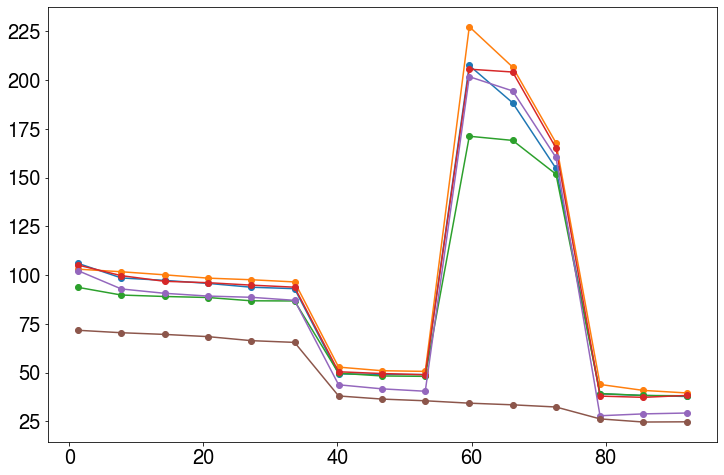

In [7]:
matplotlib.pyplot.plot(timepoints, df[control_wells], 'o-')
matplotlib.pyplot.show()

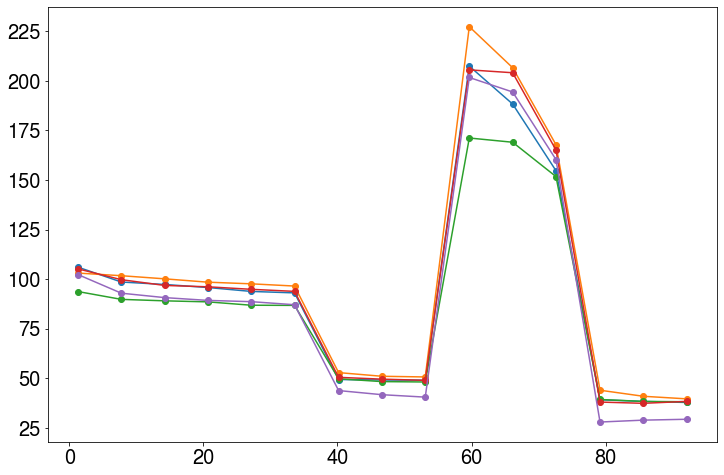

In [8]:
matplotlib.pyplot.plot(timepoints, df[control_wells_representative], 'o-')
matplotlib.pyplot.show()

## samples 4 h 0.5 uM

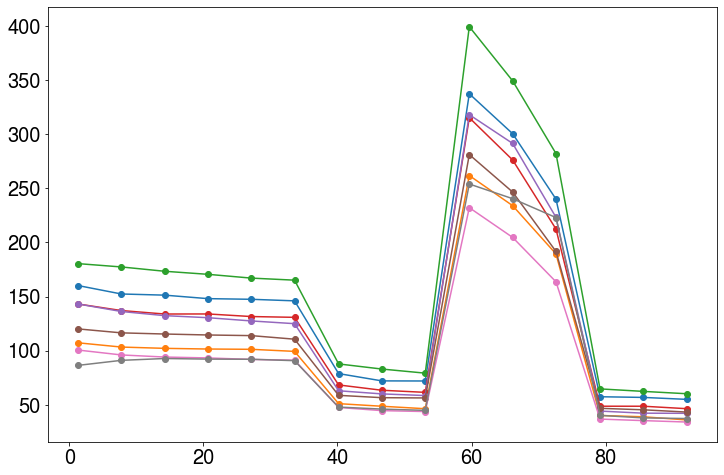

In [9]:
matplotlib.pyplot.plot(timepoints, df[samples_4h_half], 'o-')
matplotlib.pyplot.show()

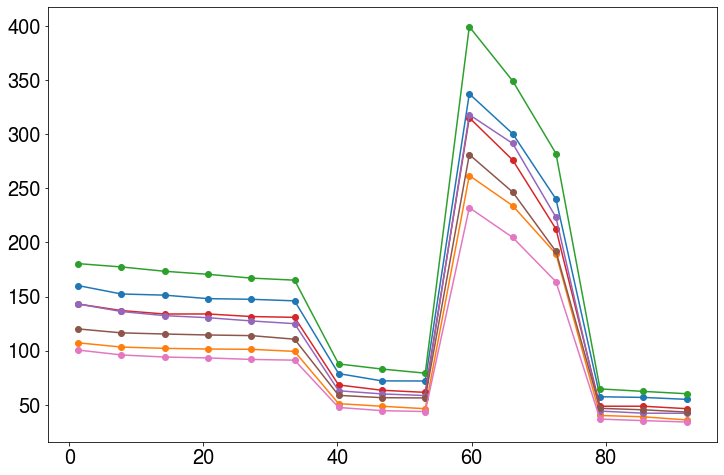

In [10]:
matplotlib.pyplot.plot(timepoints, df[samples_4h_half_representative], 'o-')
matplotlib.pyplot.show()

In [11]:
df[samples_4h_half]

,D04,D05,D06,D07,D08,D09,D10,D11
0,160.200449,107.273546,180.471932,143.162704,143.162106,120.123675,100.579813,86.401740
1,152.403570,103.337345,177.394099,137.084756,136.211764,116.463848,96.045276,91.053937
2,151.328040,102.147884,173.404700,133.885478,132.382297,115.391338,94.116776,92.748334
3,148.093574,101.521949,170.579366,133.938235,130.482225,114.500117,93.281190,92.196653
4,147.495298,101.258096,167.082592,131.549812,127.489425,113.911445,91.902129,92.065491
5,146.057111,99.343900,165.181339,130.816182,124.960614,110.614123,91.220873,90.746731
6,78.804351,51.020421,87.739366,68.321811,62.932372,58.704979,47.498934,47.855916
7,72.067428,48.617911,83.007654,63.399757,60.030223,56.545209,44.567320,45.996918
8,71.970549,46.338940,79.209264,61.462497,58.513019,56.287168,43.722513,44.820298
9,337.461469,261.892538,399.501835,315.346214,318.151088,281.253027,232.202062,254.063768


## samples 4 h five

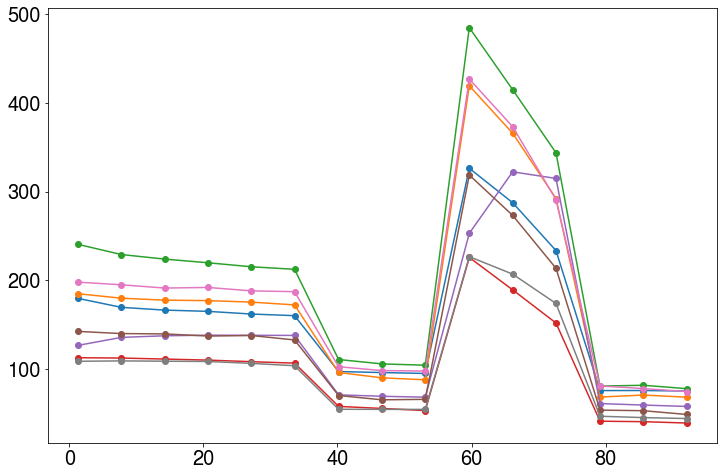

In [12]:
matplotlib.pyplot.plot(timepoints, df[samples_4h_five], 'o-')
matplotlib.pyplot.show()

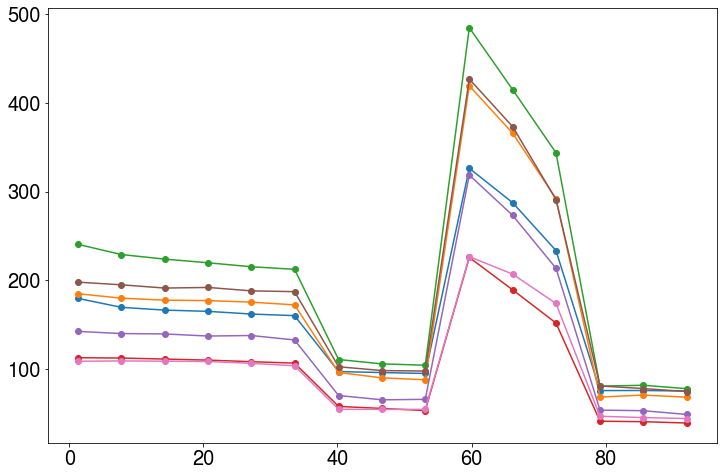

In [13]:
matplotlib.pyplot.plot(timepoints, df[samples_4h_five_representative], 'o-')
matplotlib.pyplot.show()

In [18]:
# build figure

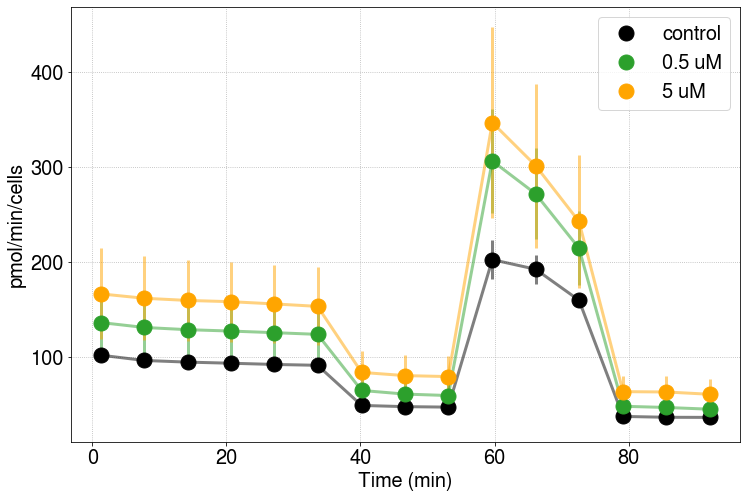

In [61]:
mean = df[control_wells_representative].mean(axis=1)
std = df[control_wells_representative].std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='black', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='black', ms=15, label='control', zorder=999)

mean = df[samples_4h_half_representative].mean(axis=1)
std = df[samples_4h_half_representative].std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#2CA02C', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#2CA02C', ms=15, label='0.5 uM', zorder=999)

mean = df[samples_4h_five_representative].mean(axis=1)
std = df[samples_4h_five_representative].std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#FFA500', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#FFA500', ms=15, label='5 uM', zorder=999)

matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('pmol/min/cells')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

In [62]:
# statistical tests
for i in range(len(timepoints)):
    timepoint = timepoints[i]
    x = df[control_wells_representative].iloc[i, :].values
    y = df[samples_4h_half_representative].iloc[i, :].values
    z = df[samples_4h_five_representative].iloc[i, :].values
    
    stat, pvalue = scipy.stats.mannwhitneyu(x, z)
    
    print(i)
    print(timepoint)
    print(x)
    print(y)
    print(z)
    print(stat, pvalue)
    
    print()
    

0
1.31182166
[106.04184934 103.066599    93.74628151 105.18556077 102.30294616]
[160.20044915 107.27354555 180.4719323  143.16270365 143.16210645
 120.12367463 100.57981303]
[179.53845228 184.7984889  240.48995625 112.58960964 142.3067893
 197.85753446 108.58304496]
0.0 0.0025252525252525255

1
7.77566669
[ 98.55634048 101.73905268  89.80378956  99.73402705  92.91833894]
[152.40356978 103.33734468 177.39409857 137.08475577 136.21176412
 116.46384789  96.04527637]
[169.43381984 179.74460532 229.00004185 112.23732922 139.83431553
 194.86096494 109.00866307]
0.0 0.0025252525252525255

2
14.2333211116667
[ 97.31441697 100.1624517   89.06280708  96.83313039  90.68951386]
[151.32804034 102.14788364 173.40470016 133.88547838 132.38229725
 115.39133778  94.11677602]
[166.31594466 177.53972238 223.83912674 111.08081148 139.44130196
 191.18180601 108.68395353]
0.0 0.0025252525252525255

3
20.6934414133333
[95.77734807 98.47061515 88.5401552  96.1393201  89.27746463]
[148.09357364 101.52194852 17

In [50]:
print(len(timepoints))

15


In [54]:
df[samples_4h_half_representative].iloc[0, :]

D04    160.200449
D05    107.273546
D06    180.471932
D07    143.162704
D08    143.162106
D09    120.123675
D10    100.579813
Name: 0, dtype: float64

In [53]:
df[samples_4h_half_representative]

,D04,D05,D06,D07,D08,D09,D10
0,160.200449,107.273546,180.471932,143.162704,143.162106,120.123675,100.579813
1,152.403570,103.337345,177.394099,137.084756,136.211764,116.463848,96.045276
2,151.328040,102.147884,173.404700,133.885478,132.382297,115.391338,94.116776
3,148.093574,101.521949,170.579366,133.938235,130.482225,114.500117,93.281190
4,147.495298,101.258096,167.082592,131.549812,127.489425,113.911445,91.902129
5,146.057111,99.343900,165.181339,130.816182,124.960614,110.614123,91.220873
6,78.804351,51.020421,87.739366,68.321811,62.932372,58.704979,47.498934
7,72.067428,48.617911,83.007654,63.399757,60.030223,56.545209,44.567320
8,71.970549,46.338940,79.209264,61.462497,58.513019,56.287168,43.722513
9,337.461469,261.892538,399.501835,315.346214,318.151088,281.253027,232.202062
